In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
##dir = "/Users/junhyunbae/Documents/국민체력100/data/국민체력100데이터"
dir = "C:/Users/Jun-Hyun Bae/Desktop/raw_data/국민100/data/국민체력100데이터"
#파일들이 있는 폴더명으로 폴더내 파일 목록 확인
folders = os.listdir(dir)
print(folders)

#폴더 내 모든 파일을 한 파일로 통합
df_all = pd.DataFrame()
for i in range(0, len(folders)):
    if folders[i].split('.')[1] == 'csv':
      file = dir+'/'+folders[i]
      df = pd.read_csv(file,encoding='utf-8')
      df_all = pd.concat([df_all, df])

#합쳐진 데이터 파일 확인
print(df_all.shape)
#대표 데이터 프레임 확인
print(df_all.head(5))
#데이터 컬럼 이름/타입 정보 확인
print(df_all.info())

['.DS_Store', '._.DS_Store', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201110.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201111.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201112.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201205.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201206.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201207.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201208.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201209.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201210.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201211.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201212.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201303.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201304.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201305.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201306.csv', '._KS_NFA_FTNESS_MESURE_MVN_PRSCRPTN_GNRLZ_INFO_201307.c

In [3]:
df_all.columns

# Columns 의 데이터 변수명 변경 및 확인
df_all.rename(columns={'AGRDE_FLAG_NM':'Age Group'}, inplace=True)
df_all.rename(columns={'MESURE_AGE_CO':'Age', 'MESURE_DE':'Day of Measurement', 'SEXDSTN_FLAG_CD':'Gender'}, inplace=True)
df_all.rename(columns={'MESURE_IEM_001_VALUE':'Height (cm)','MESURE_IEM_002_VALUE':'Weight (kg)','MESURE_IEM_003_VALUE':'% of Body Fat (%)','MESURE_IEM_004_VALUE':'Waist Circumference (cm)','MESURE_IEM_005_VALUE':'DBP (mmHg)','MESURE_IEM_006_VALUE':'SBP (mmHg','MESURE_IEM_007_VALUE':'Grip Strength (kg)','MESURE_IEM_008_VALUE':'Normalized Grip Strength (kg)','MESURE_IEM_009_VALUE':'유소년 청소년 윗몸말아올리기(회)_근지구력','MESURE_IEM_010_VALUE':'청소년 반복점프(회)_근지구력','MESURE_IEM_012_VALUE':'청소년 성인 노인 Sit & Reach (cm)','MESURE_IEM_013_VALUE':'청소년 일리노이검사(sec)_민첩성','MESURE_IEM_014_VALUE':'청소년 성인 체공시간(sec)_순발력','MESURE_IEM_015_VALUE':'청소년 눈손_협응력시간(sec)_협응력','MESURE_IEM_016_VALUE':'청소년 눈손_협응력실수횟수(회)_협응력','MESURE_IEM_017_VALUE':'청소년 눈손_협응력계산결과값(sec)','MESURE_IEM_018_VALUE':'청소년 성인 노인 BMI (kg/m2)','MESURE_IEM_019_VALUE':'성인 교차윗몸일으키기(회)_근지구력','MESURE_IEM_020_VALUE':'유소년 청소년 성인 15m_20m 왕복오래달리기(회)_심폐지구력','MESURE_IEM_021_VALUE':'성인 10m 왕복달리기 (sec)_민첩성','MESURE_IEM_022_VALUE':'유소년 성인 제자리멀리뛰기 (cm)_순발력','MESURE_IEM_023_VALUE':'Aging Sit Stand (count/30 sec)_low muscular performance','MESURE_IEM_024_VALUE':'Aging 6 min walking (m)_Cardiorespiratory function','MESURE_IEM_025_VALUE':'Aging 2 min step (count)_Cardiorespiratory function','MESURE_IEM_026_VALUE':'Aging 3 m TUG (sec)_Balance','MESURE_IEM_027_VALUE':'Aging Figure 8 Walk Test (sec)_Coordination','MESURE_IEM_028_VALUE':'Relative Grip Strength (%)','MESURE_IEM_029_VALUE':'피두부겹합','MESURE_IEM_030_VALUE':'유소년 청소년 성인 15m_20 m 왕복오래달리기 VO2max추정값','MESURE_IEM_031_VALUE':'Treadmill HR Rest (bpm)','MESURE_IEM_032_VALUE':'Treadmill HR 3 min (bpm)','MESURE_IEM_033_VALUE':'Treadmill HR 6 min (bpm)','MESURE_IEM_034_VALUE':'Treadmill HR 9 min (bpm)','MESURE_IEM_035_VALUE':'Treadmill VO2max','MESURE_IEM_036_VALUE':'청소면 성인 스텝검사 HR rest (bpm)','MESURE_IEM_037_VALUE':'청소면 성인 스텝검사 VO2max','MESURE_IEM_038_VALUE':'Left Thigh Circum (cm)','MESURE_IEM_039_VALUE':'Right Thigh Circum (cm)','MESURE_IEM_040_VALUE':'전신반응 (sec)', 'MESURE_IEM_041_VALUE':'청소년 성인 체공시간 (sec)_순발력', 'CRTFC_FLAG_NM':'level'}, inplace=True)

# Columns 의 불필요한 columns 제거
df_all=df_all.drop(['CNTER_NM','MESURE_PLACE_FLAG_NM','INPT_FLAG_NM','MVM_PRSCRPTN_CN'], axis=1)

print(df_all.info())
print(df_all.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1810208 entries, 0 to 18968
Data columns (total 47 columns):
 #   Column                                                   Dtype  
---  ------                                                   -----  
 0   MBER_SEQ_NO_VALUE                                        object 
 1   MESURE_SEQ_NO                                            int64  
 2   Age Group                                                object 
 3   Age                                                      float64
 4   level                                                    object 
 5   Day of Measurement                                       int64  
 6   Gender                                                   object 
 7   Height (cm)                                              float64
 8   Weight (kg)                                              float64
 9   % of Body Fat (%)                                        float64
 10  Waist Circumference (cm)                         

In [4]:
df_all.rename(columns={'Height (cm)':'Height', 'Weight (kg)':'Weight'}, inplace=True)
df_all.rename(columns={'% of Body Fat (%)':'Bodyfat','Waist Circumference (cm)':'Waistcirc'}, inplace=True)
df_all.rename(columns={'DBP (mmHg)':'DBP','SBP (mmHg':'SBP','Grip Strength (kg)':'Grip'}, inplace=True)
df_all.rename(columns={'Normalized Grip Strength (kg)': 'NormalGrip'}, inplace=True)
df_all.rename(columns={'청소년 성인 노인 Sit & Reach (cm)':'sitreach',
       '청소년 성인 노인 BMI (kg/m2)':'BMI',
       'Aging Sit Stand (count/30 sec)_low muscular performance':'sitstand',
       'Aging 6 min walking (m)_Cardiorespiratory function':'6mwalkminute',
       'Aging 2 min step (count)_Cardiorespiratory function':'2minstepcount',
       'Aging 3 m TUG (sec)_Balance':'TUG',
       'Aging Figure 8 Walk Test (sec)_Coordination':'8walktestsec',
       'Relative Grip Strength (%)':'relativegrip'}, inplace=True)
print(df_all.info())
print(df_all.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1810208 entries, 0 to 18968
Data columns (total 47 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   MBER_SEQ_NO_VALUE                      object 
 1   MESURE_SEQ_NO                          int64  
 2   Age Group                              object 
 3   Age                                    float64
 4   level                                  object 
 5   Day of Measurement                     int64  
 6   Gender                                 object 
 7   Height                                 float64
 8   Weight                                 float64
 9   Bodyfat                                float64
 10  Waistcirc                              float64
 11  DBP                                    float64
 12  SBP                                    float64
 13  Grip                                   float64
 14  NormalGrip                             float64
 15  유소년 청

In [5]:
df_all['Height_m'] = df_all['Height'] / 100.0
df_all.loc[:, 'gender_numeric'] = df_all['Gender'].replace({'M': 1, 'F': 2})

In [6]:
# 'gender_numeric' 열에서 각 값이 몇 번 등장하는지 count
gender_count = df_all['gender_numeric'].value_counts()

# 'category' 열에서 각 값이 전체 데이터에서 차지하는 비율을 계산하여 출력
gender_category_count = df_all['gender_numeric'].value_counts(normalize=True)


# 결과 출력
print(gender_count)
print(gender_category_count)

gender_numeric
1    924605
2    885603
Name: count, dtype: int64
gender_numeric
1    0.510773
2    0.489227
Name: proportion, dtype: float64


In [7]:
df_all.describe().T
display(df_all.describe().T)

,count,mean,std,min,25%,50%,75%,max
MESURE_SEQ_NO,1810208.0,1.687710e+00,1.776822,1.0,1.000000e+00,1.000000e+00,2.000000e+00,5.900000e+01
Age,1810201.0,3.425981e+01,21.957078,-1.0,1.600000e+01,2.300000e+01,5.400000e+01,1.770000e+02
Day of Measurement,1810208.0,2.018446e+07,26809.612835,20111004.0,2.017030e+07,2.018112e+07,2.021043e+07,2.023041e+07
Height,1809947.0,1.644651e+02,9.574536,50.0,1.575000e+02,1.642000e+02,1.717000e+02,2.100000e+02
Weight,1809970.0,6.367800e+01,13.509481,10.0,5.410000e+01,6.200000e+01,7.170000e+01,1.843000e+02
Bodyfat,1761991.0,2.664792e+01,12.393871,0.0,2.010000e+01,2.680000e+01,3.310000e+01,4.032000e+03
Waistcirc,1009757.0,7.989639e+01,31.298253,0.0,7.300000e+01,7.990000e+01,8.670000e+01,2.432400e+04
DBP,1793279.0,7.639969e+01,59.530939,0.0,7.000000e+01,7.700000e+01,8.200000e+01,7.515400e+04
SBP,1793267.0,1.246716e+02,72.489240,-84.0,1.160000e+02,1.220000e+02,1.330000e+02,8.810100e+04
Grip,1807252.0,2.956771e+01,23.534230,-9999.0,2.170000e+01,2.760000e+01,3.700000e+01,2.343200e+04


ASM 공식 활용 추정

In [8]:
def calculate_asm(df_all):
    asm = 0.193 * df_all['Weight'] + 0.107 * df_all['Height'] - 4.157 * df_all['gender_numeric'] - 0.037 * df_all['Age'] - 2.631
    return asm
df_all['ASM'] = df_all.apply(calculate_asm, axis=1)

In [9]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
MESURE_SEQ_NO,1810208.0,1.687710e+00,1.776822,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.900000e+01
Age,1810201.0,3.425981e+01,21.957078,-1.000000e+00,1.600000e+01,2.300000e+01,5.400000e+01,1.770000e+02
Day of Measurement,1810208.0,2.018446e+07,26809.612835,2.011100e+07,2.017030e+07,2.018112e+07,2.021043e+07,2.023041e+07
Height,1809947.0,1.644651e+02,9.574536,5.000000e+01,1.575000e+02,1.642000e+02,1.717000e+02,2.100000e+02
Weight,1809970.0,6.367800e+01,13.509481,1.000000e+01,5.410000e+01,6.200000e+01,7.170000e+01,1.843000e+02
Bodyfat,1761991.0,2.664792e+01,12.393871,0.000000e+00,2.010000e+01,2.680000e+01,3.310000e+01,4.032000e+03
Waistcirc,1009757.0,7.989639e+01,31.298253,0.000000e+00,7.300000e+01,7.990000e+01,8.670000e+01,2.432400e+04
DBP,1793279.0,7.639969e+01,59.530939,0.000000e+00,7.000000e+01,7.700000e+01,8.200000e+01,7.515400e+04
SBP,1793267.0,1.246716e+02,72.489240,-8.400000e+01,1.160000e+02,1.220000e+02,1.330000e+02,8.810100e+04
Grip,1807252.0,2.956771e+01,23.534230,-9.999000e+03,2.170000e+01,2.760000e+01,3.700000e+01,2.343200e+04


In [10]:
df_all['ASM'].describe()


count    1.809741e+06
mean     1.979843e+01
std      5.024519e+00
min     -8.790000e-01
25%      1.545080e+01
50%      1.943880e+01
75%      2.384210e+01
max      4.824170e+01
Name: ASM, dtype: float64

In [11]:
df_all['ASM_by_Weight'] = df_all['ASM'] / df_all['Weight']


In [12]:
# Calculate ASM/Weight (%) for each individual
df_all['ASM_by_Weight_perc'] = (df_all['ASM'] / df_all['Weight']) * 100


In [13]:
df_all['ASM_by_Weight_perc'].describe()


count    1.809741e+06
mean     3.108646e+01
std      4.590867e+00
min     -5.484615e+00
25%      2.764526e+01
50%      3.102449e+01
75%      3.422266e+01
max      1.316310e+02
Name: ASM_by_Weight_perc, dtype: float64

In [14]:
df_all.columns

Index(['MBER_SEQ_NO_VALUE', 'MESURE_SEQ_NO', 'Age Group', 'Age', 'level',
       'Day of Measurement', 'Gender', 'Height', 'Weight', 'Bodyfat',
       'Waistcirc', 'DBP', 'SBP', 'Grip', 'NormalGrip',
       '유소년 청소년 윗몸말아올리기(회)_근지구력', '청소년 반복점프(회)_근지구력', 'sitreach',
       '청소년 일리노이검사(sec)_민첩성', '청소년 성인 체공시간(sec)_순발력', '청소년 눈손_협응력시간(sec)_협응력',
       '청소년 눈손_협응력실수횟수(회)_협응력', '청소년 눈손_협응력계산결과값(sec)', 'BMI',
       '성인 교차윗몸일으키기(회)_근지구력', '유소년 청소년 성인 15m_20m 왕복오래달리기(회)_심폐지구력',
       '성인 10m 왕복달리기 (sec)_민첩성', '유소년 성인 제자리멀리뛰기 (cm)_순발력', 'sitstand',
       '6mwalkminute', '2minstepcount', 'TUG', '8walktestsec', 'relativegrip',
       '피두부겹합', '유소년 청소년 성인 15m_20 m 왕복오래달리기 VO2max추정값',
       'Treadmill HR Rest (bpm)', 'Treadmill HR 3 min (bpm)',
       'Treadmill HR 6 min (bpm)', 'Treadmill HR 9 min (bpm)',
       'Treadmill VO2max', '청소면 성인 스텝검사 HR rest (bpm)', '청소면 성인 스텝검사 VO2max',
       'Left Thigh Circum (cm)', 'Right Thigh Circum (cm)', '전신반응 (sec)',
       '청소년 성인 체공시간 (sec)_순발력', 'Heigh

In [15]:
import pandas as pd

# Assuming df_all is your DataFrame and it already exists

# Filter the DataFrame for individuals aged 20-39
df_filtered = df_all[(df_all['Age'] >= 20) & (df_all['Age'] <= 39)]

# Calculate the mean and standard deviation for ASM by Weight Percentage in the filtered DataFrame
mean_ASM_by_Weight_perc_young = df_filtered['ASM_by_Weight_perc'].mean()
std_ASM_by_Weight_perc_young = df_filtered['ASM_by_Weight_perc'].std()

# Output the results
print("Mean ASM by Weight Percentage for 20-39 year-olds:", mean_ASM_by_Weight_perc_young)
print("Standard Deviation of ASM by Weight Percentage for 20-39 year-olds:", std_ASM_by_Weight_perc_young)

Mean ASM by Weight Percentage for 20-39 year-olds: 31.964236654803198
Standard Deviation of ASM by Weight Percentage for 20-39 year-olds: 3.196989344078821


In [16]:
mean_ASM_by_Weight_perc = 31.964236654803198
std_ASM_by_Weight_perc = 3.196989344078821

# Calculate the sarcopenia threshold
sarcopenia_threshold = mean_ASM_by_Weight_perc - 2 * std_ASM_by_Weight_perc

In [17]:
df_all['sarcopenia'] = df_all['ASM_by_Weight_perc'].apply(lambda x: 1 if x < sarcopenia_threshold else 0)


In [18]:
# Calculate the rate of sarcopenia by gender
sarcopenia_rate_by_gender = df_all.groupby('gender_numeric')['ASM_by_Weight_perc'].mean()

# Assuming gender_numeric: 1 for men, 2 for women, adjust the print statements if your encoding differs
for gender, rate in sarcopenia_rate_by_gender.items():
    gender_str = "Men" if gender == 1 else "Women"
    print(f"Rate of sarcopenia in {gender_str}: {rate:.2f}%")

Rate of sarcopenia in Men: 34.59%
Rate of sarcopenia in Women: 27.42%


In [19]:
# Step 3: Classify abdominal obesity
df_all['abdominal_obesity'] = df_all.apply(lambda row: 1 if (row['gender_numeric'] == 1 and row['Waistcirc'] >= 90) or 
                                                   (row['gender_numeric'] == 2 and row['Waistcirc'] >= 85) else 0, axis=1)

# Step 4: Create a final group classification
# SO group: individuals with both sarcopenia and obesity
# Normal group: individuals without sarcopenia and without obesity
# Excluded: individuals with only one of the conditions
df_all['group'] = df_all.apply(lambda row: 'SO' if row['sarcopenia'] == 1 and row['abdominal_obesity'] == 1 else
                                      ('Normal' if row['sarcopenia'] == 0 and row['abdominal_obesity'] == 0 else
                                       'Excluded'), axis=1)

In [20]:
group_counts = df_all['group'].value_counts()

# Display the counts for each group
print(group_counts)

group
Normal      1401065
Excluded     336303
SO            72840
Name: count, dtype: int64


In [21]:
# 각 그룹별로 성별(gender_numeric)에 따른 인원 수 계산
group_gender_counts = df_all.groupby(['group', 'gender_numeric']).size().unstack(fill_value=0)

# 계산된 결과 출력
print(group_gender_counts)

gender_numeric       1       2
group                         
Excluded        111838  224465
Normal          812762  588303
SO                   5   72835


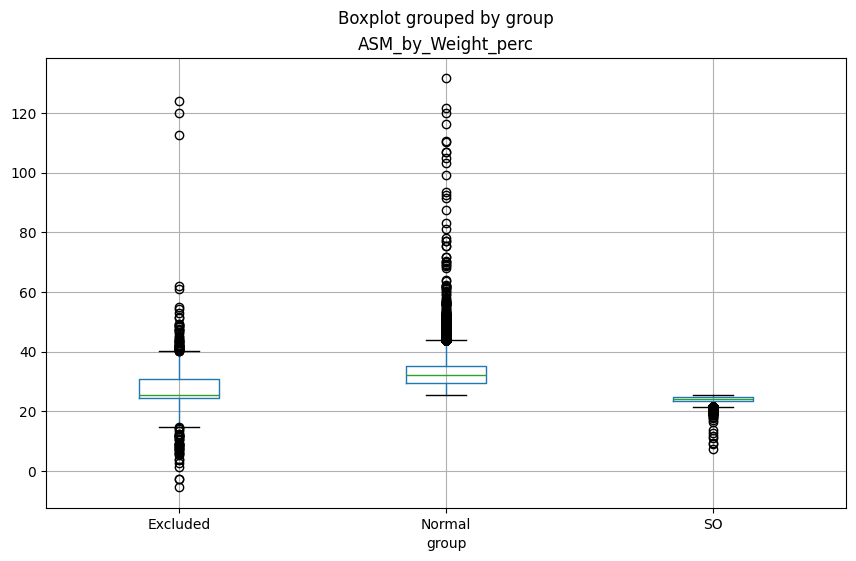

In [22]:
boxplot = df_all.boxplot(column=['ASM_by_Weight_perc'], by='group', figsize=(10, 6))

In [23]:
import pandas as pd

# Assuming df_all is your DataFrame and 'ASM_by_Weight_perc' is the column of interest

# Step 1: Remove NaN values to ensure accurate IQR calculations
df_filtered = df_all.dropna(subset=['ASM_by_Weight_perc'])

# Step 2: Calculate Q1, Q3, and IQR
Q1 = df_filtered['ASM_by_Weight_perc'].quantile(0.25)
Q3 = df_filtered['ASM_by_Weight_perc'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out outliers
df_outlier_removed = df_filtered[(df_filtered['ASM_by_Weight_perc'] >= lower_bound) & 
                                 (df_filtered['ASM_by_Weight_perc'] <= upper_bound)]

# df_outlier_removed now contains data without outliers in 'ASM_by_Weight_perc'

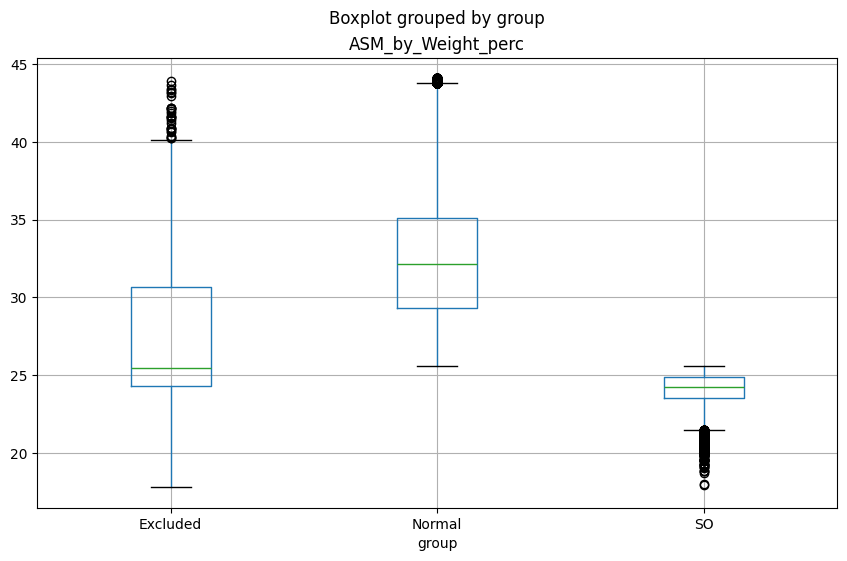

In [24]:
boxplot = df_outlier_removed.boxplot(column=['ASM_by_Weight_perc'], by='group', figsize=(10, 6))

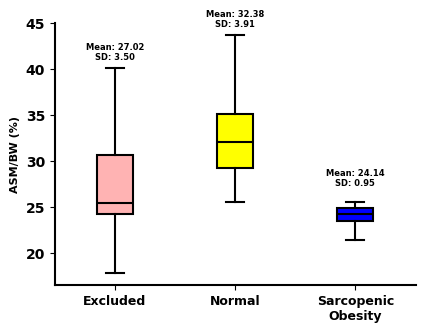

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

# Assuming df_outlier_removed is already defined and contains the data
df_outlier_removed_sorted = df_outlier_removed.sort_values('group')


custom_light_red = (1, 0.7, 0.7, 1)  # A slightly lighter red color with full opacity

# Define the order of groups and corresponding colors
group_colors = {'Excluded': custom_light_red, 'Normal': 'yellow', 'SO': 'blue'}

# Create the boxplot
fig, ax = plt.subplots(figsize=(6, 6))
df_outlier_removed_sorted.boxplot(
    column=['ASM_by_Weight_perc'], by='group',
    ax=ax, showfliers=False, patch_artist=True
)

# Adjust the spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Setting labels and font styles
ax.set_ylabel('ASM/BW (%)', fontsize=8, fontweight='bold')
ax.set_xlabel('', fontsize=8, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.grid(False)
plt.title('')
plt.suptitle('')

# Apply the colors to the boxplot patches
boxes = [item for item in ax.get_children() if isinstance(item, mpatches.Patch)]
group_list = list(group_colors.keys())
for patch, group in zip(boxes, group_list * (len(boxes) // len(group_list))):
    patch.set_facecolor(group_colors[group])
    patch.set_edgecolor('black')  # Set the box edges to black
    patch.set_linewidth(1.5)  # Set the width of the box edges

# Set the color of all lines (whiskers, caps, medians) to black
for line in ax.lines:
    line.set_color('black')
    line.set_linewidth(1.5)

# Calculate and annotate mean and SD for each group
group_data = df_outlier_removed_sorted.groupby('group')['ASM_by_Weight_perc']
for i, (group, values) in enumerate(group_data):
    mean = values.mean()
    sd = values.std()
    y = values.quantile(0.75) + (values.quantile(0.75) - values.quantile(0.25)) * 1.6
    plt.text(i+1, y, f'Mean: {mean:.2f}\nSD: {sd:.2f}', ha='center', va='bottom',
             fontsize=6, fontweight='bold', color='black',
             bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))

# Update the x-axis group names
new_group_names = ['Excluded', 'Normal', 'Sarcopenic\nObesity']
plt.xticks(ticks=np.arange(1, len(new_group_names) + 1), labels=new_group_names, fontsize=9)

plt.tight_layout(pad=7.0)
plt.show()


In [26]:
group_counts = df_outlier_removed['group'].value_counts()

# Display the counts for each group
print(group_counts)

group
Normal      1396172
Excluded     336149
SO            72830
Name: count, dtype: int64


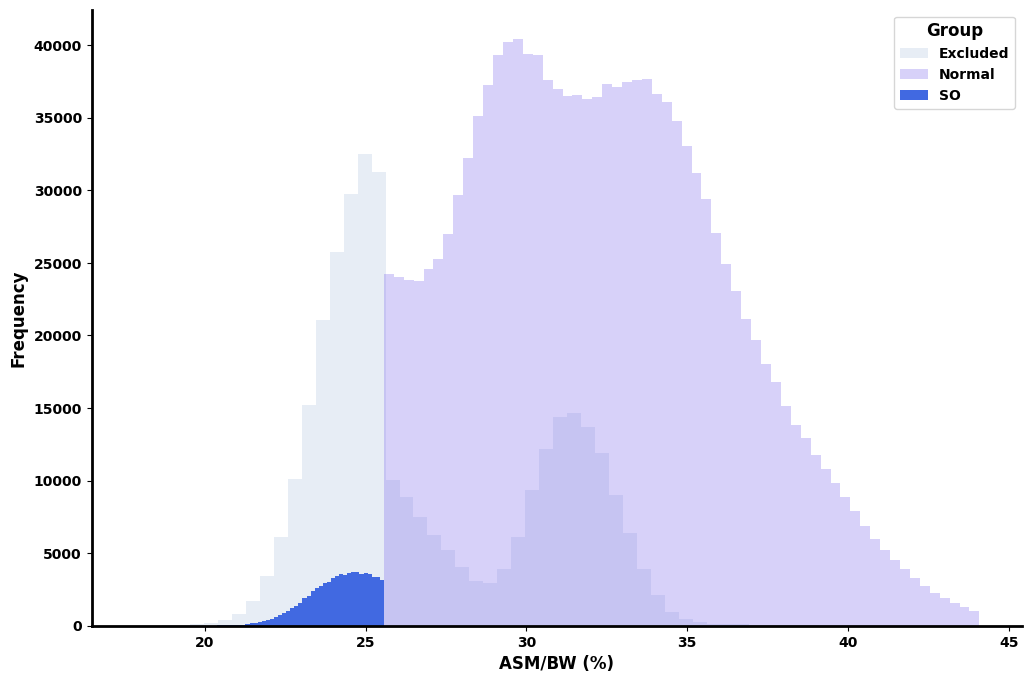

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define alpha values and colors for the groups (ensure your dataframe is set up correctly)
alpha_values = {group: 0.3 if group != 'SO' else 1.0 for group in df_outlier_removed['group'].unique()}
color_map = {
    'Excluded': '#B0C4DE',  # Light Steel Blue - lightest shade
    'Normal': '#7B68EE',    # Medium Slate Blue - medium shade
    'SO': '#4169E1'         # Dark Blue - darkest shade
}

# Plot histograms for each group
for group_name in sorted(df_outlier_removed['group'].unique()):
    subset = df_outlier_removed[df_outlier_removed['group'] == group_name]
    ax.hist(subset['ASM_by_Weight_perc'], bins=60, label=group_name, color=color_map[group_name], alpha=alpha_values[group_name])

# Customize the legend
ax.legend(title='Group', 
          title_fontproperties={'weight': 'bold', 'size': 12},
          prop={'size': 10, 'weight': 'bold'})

# Set labels with bold font and adjusted font size
ax.set_xlabel('ASM/BW (%)', fontweight='bold', fontsize=12)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=12)

# Customize tick labels to be bold
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

# Customize the spines (axes lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

# Display the plot
plt.show()

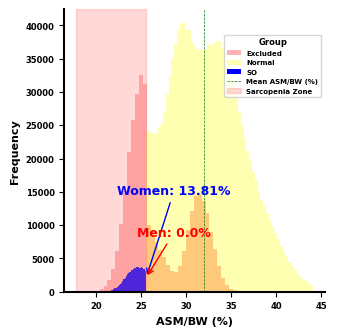

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(4, 4))

# Define alpha values and colors for the groups
alpha_values = {group: 0.3 if group != 'SO' else 1.0 for group in df_outlier_removed['group'].unique()}
color_map = {
    'Excluded': '#FF0000',  # Light Steel Blue - lightest shade
    'Normal': '#FFFF00',    # Medium Slate Blue - medium shade
    'SO': '#0000FF'         # Royal Blue - not too dark, well-balanced blue
}

# Plot histograms for each group
for group_name in sorted(df_outlier_removed['group'].unique()):
    subset = df_outlier_removed[df_outlier_removed['group'] == group_name]
    ax.hist(subset['ASM_by_Weight_perc'], bins=60, label=group_name, color=color_map[group_name], alpha=alpha_values[group_name])

# Calculate sarcopenia threshold (assuming you've calculated these previously)
mean_ASM_by_Weight_perc = 31.964236654803198
std_ASM_by_Weight_perc = 3.196989344078821
sarcopenia_threshold = mean_ASM_by_Weight_perc - 2 * std_ASM_by_Weight_perc

# Add a line for the mean and a patch for the sarcopenia threshold
ax.axvline(mean_ASM_by_Weight_perc, color='green', linestyle='dashed', linewidth=0.5, label='Mean ASM/BW (%)')
ax.axvspan(df_outlier_removed['ASM_by_Weight_perc'].min(), sarcopenia_threshold, alpha=0.3, color=(1, 0.5, 0.5, 1), label='Sarcopenia Zone', zorder=1)

# Assuming df_all is your original full DataFrame with the 'gender_numeric' column
# Calculate the percentage of each gender in the sarcopenia zone
total = len(df_all)
sarcopenia_gender_counts = df_all[df_all['ASM_by_Weight_perc'] < sarcopenia_threshold]['gender_numeric'].value_counts()
percentages = (sarcopenia_gender_counts / total * 100).round(2)

# Annotate the percentage of each gender in the sarcopenia zone
# Define custom arrow properties for Men and Women
arrowprops_dict = {
    'Men': dict(arrowstyle="->", color="red"), #connectionstyle="angle,angleA=0,angleB=60,rad=10"),
    'Women': dict(arrowstyle="->", color="blue") #connectionstyle="angle,angleA=0,angleB=-60,rad=-10")
}

# Annotate the percentage of each gender in the sarcopenia zone with separate arrow properties
offsets = {'Men': 30, 'Women': 60}  # Different offsets for Men and Women to avoid overlapping
colors = {'Men': 'red', 'Women': 'blue'} 
for gender, percentage in percentages.items():
    gender_str = "Men" if gender == 1 else "Women"
    ax.annotate(f"{gender_str}: {percentage}%",
                xy=(sarcopenia_threshold, ax.get_ylim()[1] * 0.05),
                xytext=(20, offsets[gender_str]),
                textcoords='offset points',
                arrowprops=arrowprops_dict[gender_str],
                fontsize=9,
                fontweight='bold',
                color=colors[gender_str],
                ha='center')

# Customize the legend
# Customize the legend and position it outside the plot on the right side
ax.legend(title='Group',
          title_fontproperties={'weight': 'bold', 'size': 6},
          prop={'size': 5, 'weight': 'bold'},
          loc='center left',  # Align the center of the legend to the left of the anchor point
          bbox_to_anchor=(0.6, 0.8))  # Anchor the legend at the middle right outside of the plot

# Set labels with bold font and adjusted font size
ax.set_xlabel('ASM/BW (%)', fontweight='bold', fontsize=8)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=8)

# Customize tick labels to be bold
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(6)

# Customize the spines (axes lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Display the plot
plt.tight_layout(pad=3.0)
plt.show()

In [29]:
# Grouping the data by 'group_numeric' and calculating the mean, std, and count for 'Value'
grouped_stats = df_outlier_removed.groupby('group')['ASM_by_Weight_perc'].agg(['mean', 'std', 'count'])

print(grouped_stats)

               mean       std    count
group                                 
Excluded  27.015750  3.502535   336149
Normal    32.382339  3.914711  1396172
SO        24.138928  0.948429    72830


In [30]:
# Filter the DataFrame for individuals aged 65 or older
df_outlier_removed_age = df_outlier_removed[df_outlier_removed['Age'] >= 65]

In [31]:
# Assuming df_all is your DataFrame

# Filter out rows where the 'group' column is 'Excluded'
df_filtered = df_outlier_removed_age[df_outlier_removed_age['group'] != 'Excluded']

# df_filtered now contains only the rows where 'group' is either 'Normal' or 'SO'

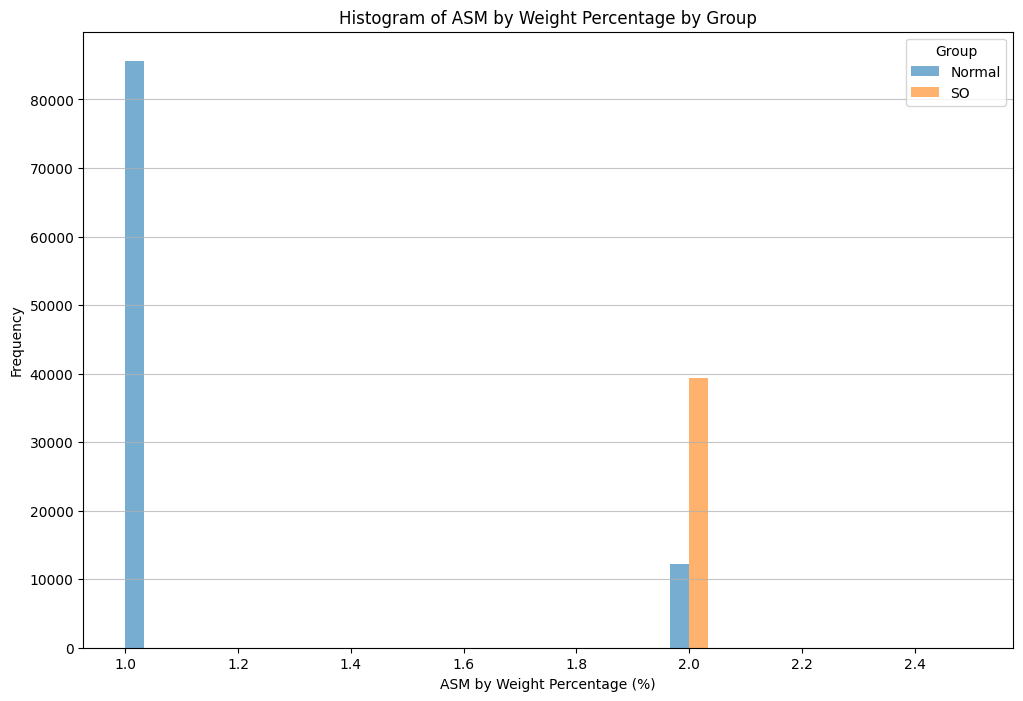

In [32]:

# Create a figure and axis for the plot
plt.figure(figsize=(12, 8))

# Plot histograms for each group
for group_name in df_filtered['group'].unique():
    subset = df_filtered[df_filtered['group'] == group_name]
    plt.hist(subset['gender_numeric'], bins=30, alpha=0.6, label=group_name)

plt.title('Histogram of ASM by Weight Percentage by Group')
plt.xlabel('ASM by Weight Percentage (%)')
plt.ylabel('Frequency')
plt.legend(title='Group')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

In [33]:
# Filter the DataFrame for individuals aged 65 or older
df_filtered_65_or_older = df_filtered[df_filtered['Age'] >= 65]

In [34]:
import pandas as pd

# Assuming 'ASM_by_Weight_perc' is the column of interest

# Step 1: Remove NaN values to ensure accurate IQR calculations
df_filtered_65_or_older = df_filtered_65_or_older.dropna(subset=['ASM_by_Weight_perc'])

# Step 2: Calculate Q1, Q3, and IQR
Q1 = df_filtered_65_or_older['ASM_by_Weight_perc'].quantile(0.25)
Q3 = df_filtered_65_or_older['ASM_by_Weight_perc'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out outliers
df_filtered_65_or_older = df_filtered_65_or_older[(df_filtered_65_or_older['ASM_by_Weight_perc'] >= lower_bound) & 
                                 (df_filtered_65_or_older['ASM_by_Weight_perc'] <= upper_bound)]

# df_outlier_removed now contains data without outliers in 'ASM_by_Weight_perc'

In [35]:
df_filtered_65_or_older.columns

Index(['MBER_SEQ_NO_VALUE', 'MESURE_SEQ_NO', 'Age Group', 'Age', 'level',
       'Day of Measurement', 'Gender', 'Height', 'Weight', 'Bodyfat',
       'Waistcirc', 'DBP', 'SBP', 'Grip', 'NormalGrip',
       '유소년 청소년 윗몸말아올리기(회)_근지구력', '청소년 반복점프(회)_근지구력', 'sitreach',
       '청소년 일리노이검사(sec)_민첩성', '청소년 성인 체공시간(sec)_순발력', '청소년 눈손_협응력시간(sec)_협응력',
       '청소년 눈손_협응력실수횟수(회)_협응력', '청소년 눈손_협응력계산결과값(sec)', 'BMI',
       '성인 교차윗몸일으키기(회)_근지구력', '유소년 청소년 성인 15m_20m 왕복오래달리기(회)_심폐지구력',
       '성인 10m 왕복달리기 (sec)_민첩성', '유소년 성인 제자리멀리뛰기 (cm)_순발력', 'sitstand',
       '6mwalkminute', '2minstepcount', 'TUG', '8walktestsec', 'relativegrip',
       '피두부겹합', '유소년 청소년 성인 15m_20 m 왕복오래달리기 VO2max추정값',
       'Treadmill HR Rest (bpm)', 'Treadmill HR 3 min (bpm)',
       'Treadmill HR 6 min (bpm)', 'Treadmill HR 9 min (bpm)',
       'Treadmill VO2max', '청소면 성인 스텝검사 HR rest (bpm)', '청소면 성인 스텝검사 VO2max',
       'Left Thigh Circum (cm)', 'Right Thigh Circum (cm)', '전신반응 (sec)',
       '청소년 성인 체공시간 (sec)_순발력', 'Heigh

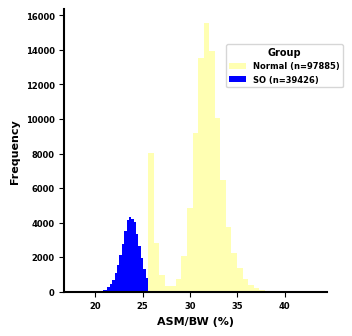

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(4, 4))

# Define alpha values and colors for the groups
alpha_values = {group: 0.3 if group != 'SO' else 1.0 for group in df_filtered_65_or_older['group'].unique()}
color_map = {
    'Excluded': '#FF0000',  # Red
    'Normal': '#FFFF00',    # Yellow
    'SO': '#0000FF'         # Blue
}

# Calculate the group counts
group_counts = df_filtered_65_or_older['group'].value_counts()

# Plot histograms for each group with custom colors
for group_name in sorted(df_filtered_65_or_older['group'].unique()):
    subset = df_filtered_65_or_older[df_filtered_65_or_older['group'] == group_name]
    counts = group_counts[group_name]
    ax.hist(subset['ASM_by_Weight_perc'], bins=30, alpha=alpha_values[group_name], label=f"{group_name} (n={counts})", color=color_map[group_name])

# Add a title and axis labels with customized font properties
#ax.set_title('Histogram of ASM by Weight Percentage by Group')
ax.set_xlabel('ASM/BW (%)', fontweight='bold', fontsize=8)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=8)

# Customize the tick labels to be bold and set their font size
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(6)

# Customize the legend to display outside the plot
ax.legend(title='Group',
          title_fontproperties={'weight': 'bold', 'size': 7},
          prop={'size': 6, 'weight': 'bold'},
          loc='center left',  # Align the center of the legend to the left of the anchor point
          bbox_to_anchor=(0.6, 0.8))  # Anchor the legend at the middle right outside of the plot

# Customize the spines (axes lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Grid configuration
ax.grid(False)

# Display the plot
plt.tight_layout(pad=3.0)
plt.show()

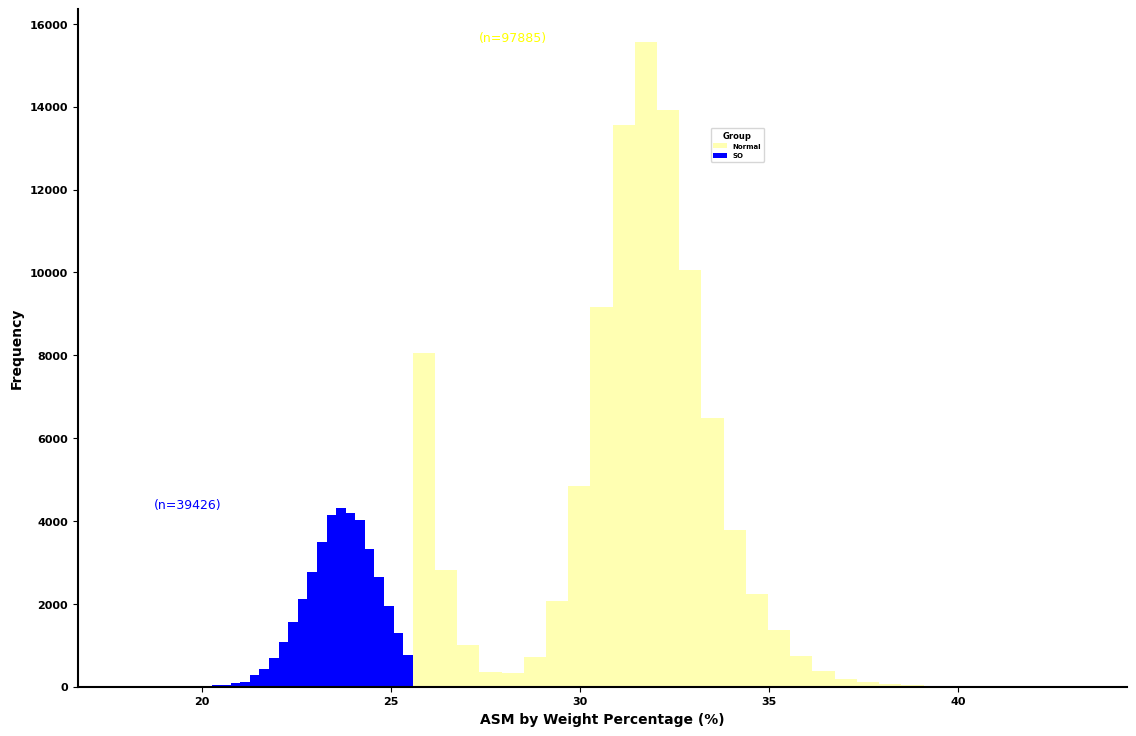

In [37]:
import matplotlib.pyplot as plt

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define alpha values and colors for the groups
alpha_values = {group: 0.3 if group != 'SO' else 1.0 for group in df_filtered_65_or_older['group'].unique()}
color_map = {
    'Excluded': '#FF0000',  # Red
    'Normal': '#FFFF00',    # Yellow
    'SO': '#0000FF'         # Blue
}

# Calculate the group counts
group_counts = df_filtered_65_or_older['group'].value_counts()

# Plot histograms for each group with custom colors and annotate with group counts
for group_name in sorted(df_filtered_65_or_older['group'].unique()):
    subset = df_filtered_65_or_older[df_filtered_65_or_older['group'] == group_name]
    counts = group_counts[group_name]
    n, bins, patches = ax.hist(subset['ASM_by_Weight_perc'], bins=30, alpha=alpha_values[group_name], label=group_name, color=color_map[group_name])
    # Place the text annotation for group count
    ax.text(x=bins[3], y=max(n), s=f"(n={counts})", color=color_map[group_name], fontsize=9)

# Add a title
#ax.set_title('Histogram of ASM by Weight Percentage by Group', fontweight='bold', fontsize=12)

# Set labels with bold font and adjusted font size
ax.set_xlabel('ASM by Weight Percentage (%)', fontweight='bold', fontsize=10)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=10)

# Customize the legend and position it outside the plot on the right side
ax.legend(title='Group',
          title_fontproperties={'weight': 'bold', 'size': 6},
          prop={'size': 5, 'weight': 'bold'},
          loc='center left',  # Align the center of the legend to the left of the anchor point
          bbox_to_anchor=(0.6, 0.8))  # Anchor the legend at the middle right outside of the plot

# Customize the tick labels to be bold and set their font size
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)

# Customize the spines (axes lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Remove grid lines
ax.grid(False)

# Display the plot
plt.tight_layout(pad=3.0)
plt.show()

In [38]:
group_counts = df_filtered_65_or_older['group'].value_counts()

# Display the counts for each group
print(group_counts)

group
Normal    97885
SO        39426
Name: count, dtype: int64


최종데이터 

In [39]:
df_final=df_filtered_65_or_older

불필요한 column 제거

In [40]:
df_final=df_final.drop(['유소년 청소년 윗몸말아올리기(회)_근지구력',
       '청소년 반복점프(회)_근지구력','성인 교차윗몸일으키기(회)_근지구력',
       '유소년 청소년 성인 15m_20m 왕복오래달리기(회)_심폐지구력', '성인 10m 왕복달리기 (sec)_민첩성',
       '유소년 성인 제자리멀리뛰기 (cm)_순발력','유소년 청소년 성인 15m_20 m 왕복오래달리기 VO2max추정값',
       '전신반응 (sec)', '피두부겹합','청소년 성인 체공시간 (sec)_순발력','청소년 일리노이검사(sec)_민첩성', '청소년 성인 체공시간(sec)_순발력', '청소년 눈손_협응력시간(sec)_협응력',
       '청소년 눈손_협응력실수횟수(회)_협응력', '청소년 눈손_협응력계산결과값(sec)'], axis=1)

In [41]:
df_final.rename(columns={'Treadmill HR Rest (bpm)':'TreadHRrest', 'Treadmill HR 3 min (bpm)':'TreadHR3', 'Treadmill HR 6 min (bpm)':'TreadHR6', 'Treadmill HR 9 min (bpm)':'TreadHR9','Treadmill VO2max':'TreadVO2max'}, inplace=True)
df_final.rename(columns={'청소면 성인 스텝검사 HR rest (bpm)':'stepHRrest', '청소면 성인 스텝검사 VO2max':'stepVO2max','Left Thigh Circum (cm)':'L_thigh', 'Right Thigh Circum (cm)':'R_thigh'}, inplace=True)

df_final.describe().T
display(df_final.describe().T)

,count,mean,std,min,25%,50%,75%,max
MESURE_SEQ_NO,137311.0,2.093918e+00,2.591520,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.400000e+01
Age,137311.0,7.236996e+01,5.458093,6.500000e+01,6.800000e+01,7.200000e+01,7.600000e+01,1.730000e+02
Day of Measurement,137311.0,2.017778e+07,27342.946412,2.011102e+07,2.016032e+07,2.018051e+07,2.019111e+07,2.023041e+07
Height,137311.0,1.610347e+02,7.633918,1.255000e+02,1.559000e+02,1.614000e+02,1.666000e+02,1.988000e+02
Weight,137311.0,6.329990e+01,8.481247,1.600000e+01,5.790000e+01,6.320000e+01,6.850000e+01,1.292000e+02
Bodyfat,137114.0,2.918314e+01,11.566833,0.000000e+00,2.290000e+01,2.820000e+01,3.550000e+01,2.706000e+03
Waistcirc,92191.0,8.517384e+01,11.321439,0.000000e+00,8.040000e+01,8.600000e+01,8.910000e+01,1.033000e+03
DBP,137292.0,7.616408e+01,33.265567,0.000000e+00,6.900000e+01,7.600000e+01,8.300000e+01,1.111700e+04
SBP,137291.0,1.333663e+02,22.357942,0.000000e+00,1.220000e+02,1.330000e+02,1.450000e+02,4.105000e+03
Grip,137152.0,2.708086e+01,8.819808,0.000000e+00,2.100000e+01,2.690000e+01,3.300000e+01,8.080000e+02


In [42]:
df_final=df_final.drop(['TreadHRrest','TreadHR3','TreadHR6','TreadHR9','TreadVO2max','stepHRrest','stepVO2max'], axis=1)

In [43]:
df_final.describe().T
display(df_final.describe().T)

,count,mean,std,min,25%,50%,75%,max
MESURE_SEQ_NO,137311.0,2.093918e+00,2.591520,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.400000e+01
Age,137311.0,7.236996e+01,5.458093,6.500000e+01,6.800000e+01,7.200000e+01,7.600000e+01,1.730000e+02
Day of Measurement,137311.0,2.017778e+07,27342.946412,2.011102e+07,2.016032e+07,2.018051e+07,2.019111e+07,2.023041e+07
Height,137311.0,1.610347e+02,7.633918,1.255000e+02,1.559000e+02,1.614000e+02,1.666000e+02,1.988000e+02
Weight,137311.0,6.329990e+01,8.481247,1.600000e+01,5.790000e+01,6.320000e+01,6.850000e+01,1.292000e+02
Bodyfat,137114.0,2.918314e+01,11.566833,0.000000e+00,2.290000e+01,2.820000e+01,3.550000e+01,2.706000e+03
Waistcirc,92191.0,8.517384e+01,11.321439,0.000000e+00,8.040000e+01,8.600000e+01,8.910000e+01,1.033000e+03
DBP,137292.0,7.616408e+01,33.265567,0.000000e+00,6.900000e+01,7.600000e+01,8.300000e+01,1.111700e+04
SBP,137291.0,1.333663e+02,22.357942,0.000000e+00,1.220000e+02,1.330000e+02,1.450000e+02,4.105000e+03
Grip,137152.0,2.708086e+01,8.819808,0.000000e+00,2.100000e+01,2.690000e+01,3.300000e+01,8.080000e+02


In [44]:
df_final=df_final.drop(['L_thigh','R_thigh','6mwalkminute'], axis=1)

sarcopenic obesity 정의 기준을 waist circumference의 기준을 사용 하였기에 이 기준은 제거

In [45]:
df_final=df_final.drop(['MESURE_SEQ_NO','Waistcirc','Day of Measurement'], axis=1)

In [46]:
df_final.columns

Index(['MBER_SEQ_NO_VALUE', 'Age Group', 'Age', 'level', 'Gender', 'Height',
       'Weight', 'Bodyfat', 'DBP', 'SBP', 'Grip', 'NormalGrip', 'sitreach',
       'BMI', 'sitstand', '2minstepcount', 'TUG', '8walktestsec',
       'relativegrip', 'Height_m', 'gender_numeric', 'ASM', 'ASM_by_Weight',
       'ASM_by_Weight_perc', 'sarcopenia', 'abdominal_obesity', 'group'],
      dtype='object')

In [47]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 137311 entries, 590 to 18919
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MBER_SEQ_NO_VALUE   137311 non-null  object 
 1   Age Group           137311 non-null  object 
 2   Age                 137311 non-null  float64
 3   level               137311 non-null  object 
 4   Gender              137311 non-null  object 
 5   Height              137311 non-null  float64
 6   Weight              137311 non-null  float64
 7   Bodyfat             137114 non-null  float64
 8   DBP                 137292 non-null  float64
 9   SBP                 137291 non-null  float64
 10  Grip                137152 non-null  float64
 11  NormalGrip          137179 non-null  float64
 12  sitreach            136705 non-null  float64
 13  BMI                 137309 non-null  float64
 14  sitstand            136444 non-null  float64
 15  2minstepcount       130471 non-null  f

In [48]:
# 'group' 변수의 고유값과 그 빈도수 확인
unique_values = df_final['group'].value_counts()

# 결과 출력
print(unique_values)

group
Normal    97885
SO        39426
Name: count, dtype: int64


Normal =1 , SO = 2

In [49]:
df_final.loc[:, 'group_numberic'] = df_final['group'].replace({'Normal': 1, 'SO': 2})

physical performance 외 불필요한 변수들을 제거 

In [50]:
df_final=df_final.drop(['MBER_SEQ_NO_VALUE','Age Group','level'], axis=1)

In [51]:
df_final=df_final.drop(['sarcopenia','abdominal_obesity','Gender'], axis=1)

Minnmax 정규화 작업

In [52]:
df_final.columns

Index(['Age', 'Height', 'Weight', 'Bodyfat', 'DBP', 'SBP', 'Grip',
       'NormalGrip', 'sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec', 'relativegrip', 'Height_m', 'gender_numeric', 'ASM',
       'ASM_by_Weight', 'ASM_by_Weight_perc', 'group', 'group_numberic'],
      dtype='object')

In [53]:
print(df_final.info(), df_final.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 137311 entries, 590 to 18919
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 137311 non-null  float64
 1   Height              137311 non-null  float64
 2   Weight              137311 non-null  float64
 3   Bodyfat             137114 non-null  float64
 4   DBP                 137292 non-null  float64
 5   SBP                 137291 non-null  float64
 6   Grip                137152 non-null  float64
 7   NormalGrip          137179 non-null  float64
 8   sitreach            136705 non-null  float64
 9   BMI                 137309 non-null  float64
 10  sitstand            136444 non-null  float64
 11  2minstepcount       130471 non-null  float64
 12  TUG                 136394 non-null  float64
 13  8walktestsec        135821 non-null  float64
 14  relativegrip        137264 non-null  float64
 15  Height_m            137311 non-null  f

In [54]:
df_final=df_final.dropna(axis=0)

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128947 entries, 42 to 18919
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128947 non-null  float64
 1   Height              128947 non-null  float64
 2   Weight              128947 non-null  float64
 3   Bodyfat             128947 non-null  float64
 4   DBP                 128947 non-null  float64
 5   SBP                 128947 non-null  float64
 6   Grip                128947 non-null  float64
 7   NormalGrip          128947 non-null  float64
 8   sitreach            128947 non-null  float64
 9   BMI                 128947 non-null  float64
 10  sitstand            128947 non-null  float64
 11  2minstepcount       128947 non-null  float64
 12  TUG                 128947 non-null  float64
 13  8walktestsec        128947 non-null  float64
 14  relativegrip        128947 non-null  float64
 15  Height_m            128947 non-null  fl

In [56]:
# 수치형 변수 선택
numeric_vars = df_final.select_dtypes(include=['float64', 'int64']).columns

# 이상치를 제거하기 전의 데이터 수
original_counts = df_final.shape[0]

# 각 변수에서 제거된 이상치의 수를 저장할 딕셔너리
outlier_counts = {}

for column in numeric_vars:
    Q1 = df_final[column].quantile(0.25)
    Q3 = df_final[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치가 아닌 값들만 선택
    not_outliers = df_final[(df_final[column] >= lower_bound) & (df_final[column] <= upper_bound)]
    
    # 이상치 수 계산 및 저장
    outlier_counts[column] = original_counts - not_outliers.shape[0]
    
    # 이상치 제거된 데이터프레임 업데이트
    df_final = not_outliers

# 이상치가 제거된 후의 데이터 수
cleaned_counts = df_final.shape[0]

# 이상치 제거 결과 출력
print(f"Original data count: {original_counts}")
print(f"Data count after outlier removal: {cleaned_counts}")
print(f"Outliers removed per variable: {outlier_counts}")

Original data count: 128947
Data count after outlier removal: 107545
Outliers removed per variable: {'Age': 688, 'Height': 1085, 'Weight': 3282, 'Bodyfat': 3439, 'DBP': 4173, 'SBP': 4624, 'Grip': 4814, 'NormalGrip': 4969, 'sitreach': 6649, 'BMI': 7820, 'sitstand': 8570, '2minstepcount': 14088, 'TUG': 18315, '8walktestsec': 21021, 'relativegrip': 21254, 'Height_m': 21402, 'gender_numeric': 21402, 'ASM': 21402, 'ASM_by_Weight': 21402, 'ASM_by_Weight_perc': 21402, 'group_numberic': 21402}


In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107545 entries, 42 to 18856
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 107545 non-null  float64
 1   Height              107545 non-null  float64
 2   Weight              107545 non-null  float64
 3   Bodyfat             107545 non-null  float64
 4   DBP                 107545 non-null  float64
 5   SBP                 107545 non-null  float64
 6   Grip                107545 non-null  float64
 7   NormalGrip          107545 non-null  float64
 8   sitreach            107545 non-null  float64
 9   BMI                 107545 non-null  float64
 10  sitstand            107545 non-null  float64
 11  2minstepcount       107545 non-null  float64
 12  TUG                 107545 non-null  float64
 13  8walktestsec        107545 non-null  float64
 14  relativegrip        107545 non-null  float64
 15  Height_m            107545 non-null  fl

In [58]:
# 'group' 변수의 고유값과 그 빈도수 확인
unique_values = df_final['group_numberic'].value_counts()

# 결과 출력
print(unique_values)

group_numberic
1    79581
2    27964
Name: count, dtype: int64


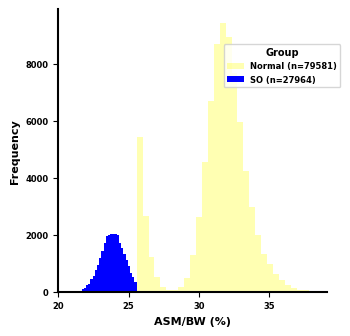

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(4, 4))

# Define alpha values and colors for the groups
alpha_values = {group: 0.3 if group != 'SO' else 1.0 for group in df_final['group'].unique()}
color_map = {
    'Excluded': '#FF0000',  # Red
    'Normal': '#FFFF00',    # Yellow
    'SO': '#0000FF'         # Blue
}

# Calculate the group counts
group_counts = df_final['group'].value_counts()

# Plot histograms for each group with custom colors
for group_name in sorted(df_final['group'].unique()):
    subset = df_final[df_final['group'] == group_name]
    counts = group_counts[group_name]
    ax.hist(subset['ASM_by_Weight_perc'], bins=30, alpha=alpha_values[group_name], label=f"{group_name} (n={counts})", color=color_map[group_name])

# Add a title and axis labels with customized font properties
#ax.set_title('Histogram of ASM by Weight Percentage by Group')
ax.set_xlabel('ASM/BW (%)', fontweight='bold', fontsize=8)
ax.set_ylabel('Frequency', fontweight='bold', fontsize=8)

# Customize the tick labels to be bold and set their font size
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(6)

# Customize the legend to display outside the plot
ax.legend(title='Group',
          title_fontproperties={'weight': 'bold', 'size': 7},
          prop={'size': 6, 'weight': 'bold'},
          loc='center left',  # Align the center of the legend to the left of the anchor point
          bbox_to_anchor=(0.6, 0.8))  # Anchor the legend at the middle right outside of the plot

# Customize the spines (axes lines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# Grid configuration
ax.grid(False)

# Display the plot
plt.tight_layout(pad=3.0)
plt.show()

In [60]:
df_final=df_final.sort_index(ascending=True)
#기존 데이터 index값이 31부터 시작 하였는데, 새롭게 0부터 시작하는 데이터 구조로 바꿈
df_final=df_final.reset_index(drop=True)

In [61]:
df_final.describe().T
display(df_final.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,107545.0,71.818327,4.989234,65.000000,68.000000,71.000000,75.00000,88.000000
Height,107545.0,161.607866,7.170701,141.400000,156.800000,162.000000,166.90000,182.200000
Weight,107545.0,63.266949,7.686985,42.180000,58.100000,63.300000,68.40000,84.440000
Bodyfat,107545.0,28.459347,8.054066,4.100000,22.600000,27.500000,34.40000,54.000000
DBP,107545.0,76.169910,9.942480,48.000000,69.000000,77.000000,83.00000,104.000000
SBP,107545.0,133.538446,15.145746,88.000000,122.000000,133.000000,145.00000,179.000000
Grip,107545.0,27.856089,7.615429,3.500000,22.000000,27.800000,33.50000,50.900000
NormalGrip,107545.0,29.207726,7.799333,3.850000,23.200000,29.100000,35.00000,53.000000
sitreach,107545.0,8.582888,9.193270,-17.500000,2.600000,9.000000,15.20000,34.500000
BMI,107545.0,24.256375,2.830490,16.300000,22.300000,24.200000,26.20000,32.300000


In [62]:
# Grouping the data by 'group_numeric' and calculating the mean, std, and count for 'Value'
grouped_stats = df_final.groupby('group_numberic')['ASM_by_Weight_perc'].agg(['mean', 'std', 'count'])

print(grouped_stats)

                     mean       std  count
group_numberic                            
1               31.302304  2.358951  79581
2               23.842639  0.794853  27964


In [63]:
# 정규화된 데이터프레임을 CSV 파일로 저장
file_path = 'C:/Users/Jun-Hyun Bae/Desktop/raw_data/국민100/sarcopenic_obesity/so_original.csv'

# to_csv 메서드를 사용하여 데이터프레임을 CSV 파일로 저장
df_final.to_csv(file_path, index=False)

# 저장 성공 메시지 출력
print(f'Dataframe successfully saved to {file_path}')

Dataframe successfully saved to C:/Users/Jun-Hyun Bae/Desktop/raw_data/국민100/sarcopenic_obesity/so_original.csv


In [64]:
from sklearn.preprocessing import MinMaxScaler

# 데이터프레임(df_final)을 예시로 사용합니다. 실제 데이터프레임 이름으로 대체해주세요.
# df_final = pd.read_csv('your_dataframe.csv') 또는 이미 데이터프레임이 있다고 가정합니다.

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# 수치형 변수 선택 (object 타입을 제외한 모든 열을 선택합니다.)
numeric_vars = df_final.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).columns

# 수치형 변수에 대해 정규화 수행
df_final[numeric_vars] = scaler.fit_transform(df_final[numeric_vars])

# 정규화된 데이터프레임 확인
print(df_final.head())


        Age    Height    Weight   Bodyfat       DBP       SBP      Grip  \
0  0.043478  0.676471  0.909134  0.356713  0.250000  0.395604  0.968354   
1  0.347826  0.137255  0.052532  0.342685  0.392857  0.131868  0.409283   
2  0.565217  0.311275  0.255088  0.452906  0.428571  0.373626  0.358650   
3  0.304348  0.056373  0.574539  0.809619  0.571429  0.439560  0.327004   
4  0.478261  0.450980  0.548982  0.507014  0.553571  0.725275  0.767932   

   NormalGrip  sitreach      BMI  ...       TUG  8walktestsec  relativegrip  \
0    0.845371  0.615385  0.74375  ...  0.413897      0.500939      0.710167   
1    0.424212  0.457692  0.26250  ...  0.376133      0.432219      0.625190   
2    0.416073  0.636538  0.37500  ...  0.906344      0.737514      0.476480   
3    0.355036  0.692308  0.99375  ...  0.498489      0.609839      0.267071   
4    0.709054  0.490385  0.58125  ...  0.496979      0.549380      0.707132   

   Height_m  gender_numeric       ASM  ASM_by_Weight  ASM_by_Weight_perc  

In [65]:
# 정규화된 데이터프레임을 CSV 파일로 저장
file_path = 'C:/Users/Jun-Hyun Bae/Desktop/raw_data/국민100/sarcopenic_obesity/so_minmax.csv'

# to_csv 메서드를 사용하여 데이터프레임을 CSV 파일로 저장
df_final.to_csv(file_path, index=False)

# 저장 성공 메시지 출력
print(f'Dataframe successfully saved to {file_path}')

Dataframe successfully saved to C:/Users/Jun-Hyun Bae/Desktop/raw_data/국민100/sarcopenic_obesity/so_minmax.csv


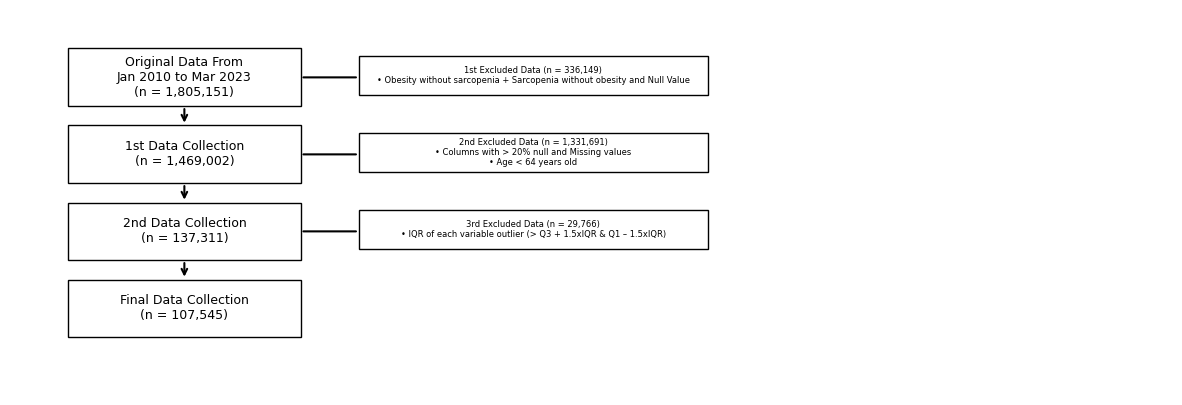

In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Function to draw a box with text inside
def draw_box(x, y, width, height, text, ax, edge_color='black'):
    # Draw a rectangle
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor=edge_color, facecolor='none')
    ax.add_patch(rect)
    # Add text inside the rectangle
    plt.text(x + width/2, y + height/2, text, horizontalalignment='center', verticalalignment='center', fontsize=9)

# Draw boxes for data collection steps
draw_box(0.05, 0.75, 0.2, 0.15, 'Original Data From\nJan 2010 to Mar 2023\n(n = 1,805,151)', ax)
draw_box(0.05, 0.55, 0.2, 0.15, '1st Data Collection\n(n = 1,469,002)', ax)
draw_box(0.05, 0.35, 0.2, 0.15, '2nd Data Collection\n(n = 137,311)', ax)
draw_box(0.05, 0.15, 0.2, 0.15, 'Final Data Collection\n(n = 107,545)', ax)

# Draw arrows
ax.annotate('', xy=(0.15, 0.75), xytext=(0.15, 0.7), arrowprops=dict(arrowstyle='<-', lw=1.5))
ax.annotate('', xy=(0.15, 0.55), xytext=(0.15, 0.5), arrowprops=dict(arrowstyle='<-', lw=1.5))
ax.annotate('', xy=(0.15, 0.35), xytext=(0.15, 0.3), arrowprops=dict(arrowstyle='<-', lw=1.5))

# Function to draw a box with text inside and adjustable font size
def draw_box(x, y, width, height, text, ax, edge_color='black', font_size=10):
    # Draw a rectangle
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor=edge_color, facecolor='none')
    ax.add_patch(rect)
    # Add text inside the rectangle, with adjustable font size
    plt.text(x + width/2, y + height/2, text, horizontalalignment='center', verticalalignment='center', fontsize=font_size)

# 여기서 font_size를 원하는 크기로 설정하세요 (예: 8, 10, 12 등)
font_size_for_text = 6

draw_box(0.3, 0.78, 0.3, 0.1, '1st Excluded Data (n = 336,149)\n• Obesity without sarcopenia + Sarcopenia without obesity and Null Value', ax, font_size=font_size_for_text)
draw_box(0.3, 0.58, 0.3, 0.1, '2nd Excluded Data (n = 1,331,691)\n• Columns with > 20% null and Missing values\n• Age < 64 years old', ax, font_size=font_size_for_text)
draw_box(0.3, 0.38, 0.3, 0.1, '3rd Excluded Data (n = 29,766)\n• IQR of each variable outlier (> Q3 + 1.5xIQR & Q1 – 1.5xIQR)', ax, font_size=font_size_for_text)

# Draw connectors between data collection and excluded data
ax.annotate('', xy=(0.25, 0.825), xytext=(0.3, 0.825), arrowprops=dict(arrowstyle='-', lw=1.5))
ax.annotate('', xy=(0.25, 0.625), xytext=(0.3, 0.625), arrowprops=dict(arrowstyle='-', lw=1.5))
ax.annotate('', xy=(0.25, 0.425), xytext=(0.3, 0.425), arrowprops=dict(arrowstyle='-', lw=1.5))

# Set limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.axis('off')

# Show the plot
plt.show()